In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('properties_colombia_train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

Primero veo el promedio de precios,luego hago una función que se le va a aplicar a precios para categorizar si es cara o no y creo la columna Target

In [4]:
promedio = train.price.mean()
promedio

643605091.0064613

In [5]:
def funcionTarget(price): #Entra los valores de la columna precios,compara con el promedio, y devuelve 0 o 1. Si es 0 es barata y si es 1 es cara
        if price < promedio:
            return 0
        elif price >= promedio:
            return 1


In [6]:
train['target']= train.price.apply(funcionTarget) # Le aplicamos la función y creamos target

Visualizamos los valores faltantes de cada columna.

In [7]:
train.isnull().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
target                 63
dtype: int64

Eliminamos las columnas l4,l5 y l6 porque el porcentaje de valores faltantes es entre 77.04% y 96.52%

In [8]:
print('Porcentaje de valores faltantes de la columna l4:', (train.l4.isnull().sum()/len(train)) * 100)

Porcentaje de valores faltantes de la columna l4: 77.03506471812057


In [9]:
print('Porcentaje de valores faltantes de la columna l6:', (train.l6.isnull().sum()/len(train)) * 100)

Porcentaje de valores faltantes de la columna l6: 96.52390039939458


In [8]:
train.drop(['l4', 'l5', 'l6'], axis=1,inplace=True) #eliminamos

En las columnas rooms,bedrooms,bathrooms,surface_total,surface_covered,lat,lon y Target les agregamos valores tomando en cuenta el promedio.

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [10]:
imputer.fit(train[['surface_total']])
train['surface_total'] = imputer.transform(train[['surface_total']])
imputer.fit(train[['rooms']])
train['rooms'] = imputer.transform(train[['rooms']])
imputer.fit(train[['bedrooms']])
train['bedrooms'] = imputer.transform(train[['bedrooms']])
imputer.fit(train[['bathrooms']])
train['bathrooms'] = imputer.transform(train[['bathrooms']])
imputer.fit(train[['surface_covered']])
train['surface_covered']= imputer.transform(train[['surface_covered']])
imputer.fit(train[['price']])
train['price'] = imputer.transform(train[['price']])
imputer.fit(train[['lat']])
train['lat'] = imputer.transform(train[['lat']])
imputer.fit(train[['lon']])
train['lon'] = imputer.transform(train[['lon']])


In [12]:
train.isnull().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                     0
lon                     0
l1                      0
l2                      0
l3                  11032
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
target                 63
dtype: int64

Columnas title,description,price_period,currency y L3 les colocamos Na en los datos faltantes

In [11]:
# Colocamos NA donde tengamos valores faltantes en esas columnas.

train.title.replace(np.nan, 'NA', inplace = True)
train.description.replace(np.nan, 'NA', inplace = True)
train.price_period.replace(np.nan, 'NA', inplace = True)
train.currency.replace(np.nan , 'NA', inplace=True)
train.l3.replace(np.nan , 'NA', inplace=True)

In [10]:
train.isnull().sum() # verificamos 

Unnamed: 0          0
id                  0
ad_type             0
start_date          0
end_date            0
created_on          0
lat                 0
lon                 0
l1                  0
l2                  0
l3                  0
rooms               0
bedrooms            0
bathrooms           0
surface_total       0
surface_covered     0
price               0
currency            0
price_period        0
title               0
description         0
property_type       0
operation_type      0
geometry            0
target             63
dtype: int64

Vuelvo a aplicar la misma función en target para que no tenga valores nulos 

In [12]:
promedio = train.price.mean()
def funcionTarget(price): #Entra los valores de la columna precios,compara con el promedio, y devuelve 0 o 1. Si es 0 es barata y si es 1 es cara
        if price < promedio:
            return 0
        elif price >= promedio:
            return 1

In [13]:
train['target']= train.price.apply(funcionTarget) # Le aplicamos la función y creamos target

Realizar la conversión de variable categóricas a numérica con OneHotEncoder

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
codificador = OneHotEncoder()
codificacion = codificador.fit_transform(train[['property_type']])
nuevas_colums = pd.DataFrame(codificacion.toarray(), columns=codificador.categories_)
nuevas_colums = nuevas_colums.iloc[:,[0,1]]
nuevas_colums

,Apartamento,Casa
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
197544,1.0,0.0
197545,0.0,0.0
197546,0.0,0.0
197547,0.0,1.0


In [16]:
codificador2 = OneHotEncoder()
codificacion2 = codificador2.fit_transform(train[['l2']])
nuevas_colums2 = pd.DataFrame(codificacion2.toarray(), columns=codificador2.categories_)
nuevas_colums2 = nuevas_colums2.iloc[:,[0,1,2,3]]
nuevas_colums2

,Amazonas,Antioquia,Arauca,Atlántico
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
197544,0.0,0.0,0.0,0.0
197545,0.0,0.0,0.0,0.0
197546,0.0,0.0,0.0,0.0
197547,0.0,0.0,0.0,0.0


Descartar y elegir columnas

In [22]:
train.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type', 'geometry',
       'target'],
      dtype='object')

In [17]:
train = train[['lat','lon','rooms','surface_covered', 'bedrooms', 'bathrooms','surface_total','target']]
datos = pd.concat([train,nuevas_colums],axis=1)
datos 

,lat,lon,rooms,surface_covered,bedrooms,bathrooms,surface_total,target,"(Apartamento,)","(Casa,)"
0,6.203000,-75.572000,3.291208,948.335646,4.000000,4.000000,1352.132349,1,0.0,1.0
1,4.722748,-74.073115,3.291208,948.335646,3.000000,2.000000,1352.132349,0,1.0,0.0
2,4.709000,-74.030000,3.291208,948.335646,3.239062,2.000000,1352.132349,0,0.0,1.0
3,5.666001,-75.041045,3.291208,948.335646,3.239062,1.000000,1352.132349,1,0.0,0.0
4,5.666001,-75.041045,3.291208,948.335646,3.239062,2.000000,1352.132349,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
197544,4.649682,-74.161950,3.000000,948.335646,3.000000,2.639279,1352.132349,0,1.0,0.0
197545,4.668000,-74.055000,3.291208,17.000000,3.239062,1.000000,1352.132349,0,0.0,0.0
197546,3.413000,-76.541000,3.291208,948.335646,3.239062,1.000000,1352.132349,0,0.0,0.0
197547,4.674874,-74.147077,3.291208,948.335646,3.239062,2.000000,1352.132349,0,0.0,1.0


In [18]:
datos = pd.concat([datos,nuevas_colums2],axis=1) #conecto mis columnas para el modelo
datos 

,lat,lon,rooms,surface_covered,bedrooms,bathrooms,surface_total,target,"(Apartamento,)","(Casa,)","(Amazonas,)","(Antioquia,)","(Arauca,)","(Atlántico,)"
0,6.203000,-75.572000,3.291208,948.335646,4.000000,4.000000,1352.132349,1,0.0,1.0,0.0,1.0,0.0,0.0
1,4.722748,-74.073115,3.291208,948.335646,3.000000,2.000000,1352.132349,0,1.0,0.0,0.0,0.0,0.0,0.0
2,4.709000,-74.030000,3.291208,948.335646,3.239062,2.000000,1352.132349,0,0.0,1.0,0.0,0.0,0.0,0.0
3,5.666001,-75.041045,3.291208,948.335646,3.239062,1.000000,1352.132349,1,0.0,0.0,0.0,0.0,0.0,0.0
4,5.666001,-75.041045,3.291208,948.335646,3.239062,2.000000,1352.132349,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,4.649682,-74.161950,3.000000,948.335646,3.000000,2.639279,1352.132349,0,1.0,0.0,0.0,0.0,0.0,0.0
197545,4.668000,-74.055000,3.291208,17.000000,3.239062,1.000000,1352.132349,0,0.0,0.0,0.0,0.0,0.0,0.0
197546,3.413000,-76.541000,3.291208,948.335646,3.239062,1.000000,1352.132349,0,0.0,0.0,0.0,0.0,0.0,0.0
197547,4.674874,-74.147077,3.291208,948.335646,3.239062,2.000000,1352.132349,0,0.0,1.0,0.0,0.0,0.0,0.0


Ver la correlación de columnas elegidas

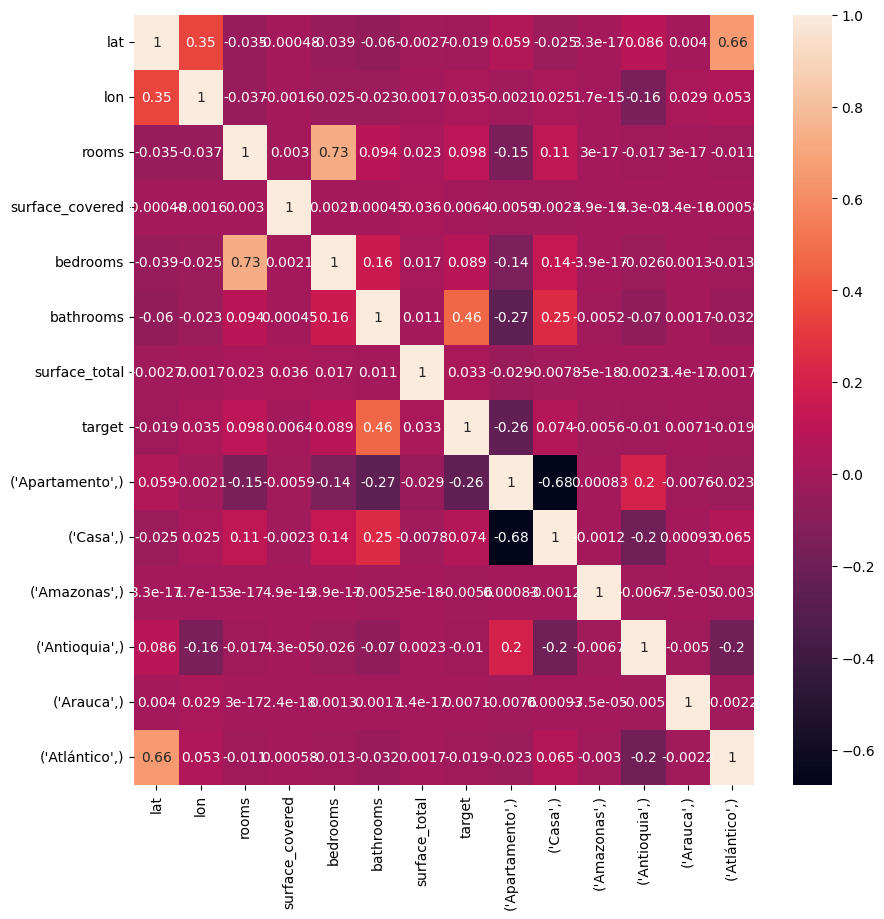

In [19]:
corr = datos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)
plt.show()

Asignado variables X e Y para el entrenamiento

In [20]:
x = datos.drop(['target'],axis=1) 
x

,lat,lon,rooms,surface_covered,bedrooms,bathrooms,surface_total,"(Apartamento,)","(Casa,)","(Amazonas,)","(Antioquia,)","(Arauca,)","(Atlántico,)"
0,6.203000,-75.572000,3.291208,948.335646,4.000000,4.000000,1352.132349,0.0,1.0,0.0,1.0,0.0,0.0
1,4.722748,-74.073115,3.291208,948.335646,3.000000,2.000000,1352.132349,1.0,0.0,0.0,0.0,0.0,0.0
2,4.709000,-74.030000,3.291208,948.335646,3.239062,2.000000,1352.132349,0.0,1.0,0.0,0.0,0.0,0.0
3,5.666001,-75.041045,3.291208,948.335646,3.239062,1.000000,1352.132349,0.0,0.0,0.0,0.0,0.0,0.0
4,5.666001,-75.041045,3.291208,948.335646,3.239062,2.000000,1352.132349,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,4.649682,-74.161950,3.000000,948.335646,3.000000,2.639279,1352.132349,1.0,0.0,0.0,0.0,0.0,0.0
197545,4.668000,-74.055000,3.291208,17.000000,3.239062,1.000000,1352.132349,0.0,0.0,0.0,0.0,0.0,0.0
197546,3.413000,-76.541000,3.291208,948.335646,3.239062,1.000000,1352.132349,0.0,0.0,0.0,0.0,0.0,0.0
197547,4.674874,-74.147077,3.291208,948.335646,3.239062,2.000000,1352.132349,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
y = datos.target
y

0         1
1         0
2         0
3         1
4         0
         ..
197544    0
197545    0
197546    0
197547    0
197548    0
Name: target, Length: 197549, dtype: int64

Elección de modelo

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

In [23]:
X_train, X_test,y_train,y_test =train_test_split(x,y,test_size=0.30, random_state=42)

In [24]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

In [25]:
pipe_dt = Pipeline([('scl', StandardScaler()),
			('clf', DecisionTreeClassifier(random_state=42))])

In [26]:
pipe_kc = Pipeline([('scl', StandardScaler()),
			('clf', KNeighborsClassifier())])

In [27]:
pipelines = [pipe_lr, pipe_kc, pipe_dt] # lo guardo en una lista a lo tres pipeline

In [28]:
pipe_dict = {0: 'Regresión Logística', 1: 'kvecinos', 2: 'Árbol de decisión'}

In [29]:
for i in pipelines: # recorro la lista para entrenar 
	i.fit(X_train, y_train)

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.


In [31]:
for idx, val in enumerate(pipelines): # Veo el que tiene mejor accuracy
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Regresión Logística pipeline accuracy en test: 0.808
kvecinos pipeline accuracy en test: 0.870
Árbol de decisión pipeline accuracy en test: 0.895


C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Guardando el mejor modelo en joblib

In [32]:
import joblib 

joblib.dump(pipe_dt, 'Mejor_pipeline.pkl', compress=1)

['Mejor_pipeline.pkl']

In [33]:
modelo = joblib.load('Mejor_pipeline.pkl') 

In [34]:
modelo.fit(X_train,y_train) # lo entreno

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Pipeline(steps=[('scl', StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [35]:
y_pre_train = modelo.predict(X_test) #hago una predicción con los datos de train 

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
from sklearn.metrics import  classification_report 
print(classification_report(y_test,y_pre_train)) # Observo su recall y accuracy

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     45460
           1       0.79      0.75      0.77     13805

    accuracy                           0.90     59265
   macro avg       0.86      0.85      0.85     59265
weighted avg       0.89      0.90      0.89     59265



Visualizamos los datos  de test

In [37]:
test = pd.read_csv('properties_colombia_test.csv')

In [38]:
test.isnull().sum() # veo si hay nulos 

Unnamed: 0             0
id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                16417
lon                16417
l1                     0
l2                     0
l3                  3657
l4                 50776
l5                 56798
l6                 63486
rooms              56740
bedrooms           52447
bathrooms          13796
surface_total      63536
surface_covered    62545
currency              17
price_period       53729
title                  0
description           27
property_type          0
operation_type         0
geometry               0
dtype: int64

Transformación de variables categorías a numéricas

In [39]:
codificadorT = OneHotEncoder()
codificacionT = codificadorT.fit_transform(test[['property_type']])
nuevas_columsT = pd.DataFrame(codificacionT.toarray(), columns=codificadorT.categories_)
nuevas_columsT = nuevas_columsT.iloc[:,[0,1]]

In [40]:
codificadorT2 = OneHotEncoder()
codificacionT2 = codificadorT2.fit_transform(test[['l2']])
nuevas_columsT2 = pd.DataFrame(codificacionT2.toarray(), columns=codificadorT2.categories_)
nuevas_columsT2= nuevas_columsT2.iloc[:,[0,1,2,3]]
nuevas_columsT2

,Amazonas,Antioquia,Arauca,Atlántico
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
65845,0.0,1.0,0.0,0.0
65846,0.0,0.0,0.0,0.0
65847,0.0,0.0,0.0,0.0
65848,0.0,0.0,0.0,0.0


In [41]:
nuevas_columsT

,Apartamento,Casa
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
65845,1.0,0.0
65846,1.0,0.0
65847,0.0,0.0
65848,1.0,0.0


In [42]:
test = test[['lat','lon','rooms','surface_covered','bedrooms', 'bathrooms','surface_total']]
datos = pd.concat([test,nuevas_columsT],axis=1)


In [43]:
datos = pd.concat([datos,nuevas_columsT2],axis=1)
datos

,lat,lon,rooms,surface_covered,bedrooms,bathrooms,surface_total,"(Apartamento,)","(Casa,)","(Amazonas,)","(Antioquia,)","(Arauca,)","(Atlántico,)"
0,4.722000,-74.075000,3.0,350.0,3.0,3.0,660.0,0.0,1.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0
2,6.259253,-75.628381,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0
3,6.203000,-75.556000,NaN,NaN,NaN,NaN,2793.0,0.0,0.0,0.0,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,6.212981,-75.599349,3.0,NaN,3.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0
65846,5.041331,-75.512415,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
65847,5.064733,-75.670570,NaN,NaN,NaN,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
65848,7.138641,-73.127312,NaN,NaN,NaN,2.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
datos.isnull().sum()

lat                0
lon                0
rooms              0
surface_covered    0
bedrooms           0
bathrooms          0
surface_total      0
(Apartamento,)     0
(Casa,)            0
(Amazonas,)        0
(Antioquia,)       0
(Arauca,)          0
(Atlántico,)       0
dtype: int64

A los datos faltantes le agrego el promedio de cada una de sus columnas

In [45]:
imputer.fit(test[['surface_total']])
datos['surface_total'] = imputer.transform(datos[['surface_total']])
imputer.fit(test[['bathrooms']])
datos['bathrooms'] = imputer.transform(datos[['bathrooms']])
imputer.fit(test[['bedrooms']])
datos['bedrooms'] = imputer.transform(datos[['bedrooms']])
imputer.fit(test[['rooms']])
datos['rooms'] = imputer.transform(datos[['rooms']])
imputer.fit(test[['lat']])
datos['lat'] = imputer.transform(datos[['lat']])
imputer.fit(test[['lon']])
datos['lon'] = imputer.transform(datos[['lon']])
imputer.fit(test[['surface_covered']])
datos['surface_covered'] = imputer.transform(datos[['surface_covered']])


In [47]:
y_pre = modelo.predict(datos) #Predecimos

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [48]:
pred = pd.DataFrame(y_pre,columns=['pred']) # Lo convertimo a un dataframe
pred

,pred
0,1
1,0
2,0
3,1
4,1
...,...
65845,0
65846,0
65847,0
65848,0


In [49]:
pred.to_csv('julieta77.csv', index=False) # lo convertimos a csv con mi nombre de github